# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 650


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | behbahan
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | kanigiri
Processing Record 12 of Set 1 | vostok
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | valparaiso
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | opuwo
Processing Record 17 of Set 1 | novikovo
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | ereymentau
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | phan thiet

Processing Record 35 of Set 4 | akhmim
Processing Record 36 of Set 4 | pitimbu
Processing Record 37 of Set 4 | illapel
Processing Record 38 of Set 4 | concordia
Processing Record 39 of Set 4 | wattegama
Processing Record 40 of Set 4 | vagur
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | guatire
Processing Record 43 of Set 4 | kizilskoye
Processing Record 44 of Set 4 | dawson creek
Processing Record 45 of Set 4 | vestmanna
Processing Record 46 of Set 4 | melsungen
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | atambua
Processing Record 0 of Set 5 | egvekinot
Processing Record 1 of Set 5 | porosozero
Processing Record 2 of Set 5 | mahebourg
Processing Record 3 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 4 of Set 5 | gazli
Processing Record 5 of Set 5 | amga
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | bereda
Proces

Processing Record 28 of Set 8 | vrangel
Processing Record 29 of Set 8 | mantua
Processing Record 30 of Set 8 | bambanglipuro
Processing Record 31 of Set 8 | bolshaya yelkhovka
City not found. Skipping...
Processing Record 32 of Set 8 | vila franca do campo
Processing Record 33 of Set 8 | natal
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | adre
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | mount hagen
Processing Record 39 of Set 8 | sampit
Processing Record 40 of Set 8 | itaquyry
Processing Record 41 of Set 8 | jumla
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | letterkenny
Processing Record 44 of Set 8 | palu
Processing Record 45 of Set 8 | marzuq
Processing Record 46 of Set 8 | avera
Processing Record 47 of Set 8 | miyang
Processing Record 48 of Set 8 | canyon lake
Processing Record 49 of Set 8 | mukhen
Processing Record 0 of Set 9 | humaita
Processing Recor

Processing Record 17 of Set 12 | erenhot
Processing Record 18 of Set 12 | manaus
Processing Record 19 of Set 12 | tianpeng
Processing Record 20 of Set 12 | dothan
Processing Record 21 of Set 12 | osoyoos
Processing Record 22 of Set 12 | pondicherry
Processing Record 23 of Set 12 | zhanaozen
Processing Record 24 of Set 12 | asuncion nochixtlan
Processing Record 25 of Set 12 | waddan
Processing Record 26 of Set 12 | vestmannaeyjar
Processing Record 27 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 28 of Set 12 | tres passos
Processing Record 29 of Set 12 | srednekolymsk
Processing Record 30 of Set 12 | vardo
Processing Record 31 of Set 12 | olmos
Processing Record 32 of Set 12 | hinton
Processing Record 33 of Set 12 | qaqortoq
Processing Record 34 of Set 12 | inta
Processing Record 35 of Set 12 | elko
Processing Record 36 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 12 | son la
Processing Record 38 of Set 12 | tecoanapa
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,behbahan,30.5959,50.2417,56.64,84,100,9.35,IR,1676248707
1,kaitangata,-46.2817,169.8464,71.65,52,30,13.96,NZ,1676248708
2,provideniya,64.3833,-173.3000,-7.49,54,75,13.42,RU,1676248708
3,rikitea,-23.1203,-134.9692,79.56,64,8,3.94,PF,1676248709
4,bluff,-46.6000,168.3333,66.79,74,6,6.71,NZ,1676248710


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,behbahan,30.5959,50.2417,56.64,84,100,9.35,IR,1676248707
1,kaitangata,-46.2817,169.8464,71.65,52,30,13.96,NZ,1676248708
2,provideniya,64.3833,-173.3000,-7.49,54,75,13.42,RU,1676248708
3,rikitea,-23.1203,-134.9692,79.56,64,8,3.94,PF,1676248709
4,bluff,-46.6000,168.3333,66.79,74,6,6.71,NZ,1676248710


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

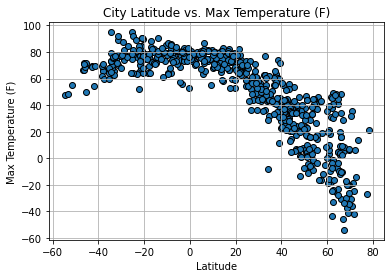

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

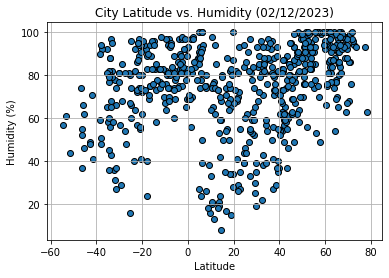

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (02/12/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

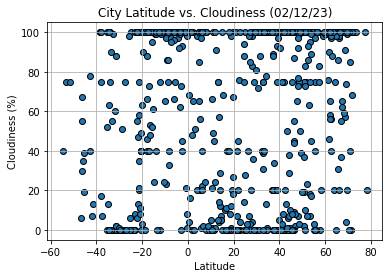

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

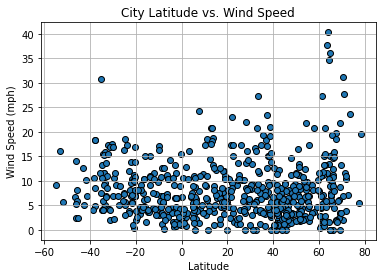

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x, y, title, xlabel, ylabel, text_coordinates):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regression, "red")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {r_value}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,behbahan,30.5959,50.2417,56.64,84,100,9.35,IR,1676248707
2,provideniya,64.3833,-173.3000,-7.49,54,75,13.42,RU,1676248708
8,hambantota,6.1241,81.1185,73.74,100,40,2.30,LK,1676248711
9,palmer,42.1584,-72.3287,40.50,59,75,3.44,US,1676248712
10,kanigiri,15.4000,79.5167,68.40,50,68,6.46,IN,1676248712


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kaitangata,-46.2817,169.8464,71.65,52,30,13.96,NZ,1676248708
3,rikitea,-23.1203,-134.9692,79.56,64,8,3.94,PF,1676248709
4,bluff,-46.6000,168.3333,66.79,74,6,6.71,NZ,1676248710
5,puerto ayora,-0.7393,-90.3518,79.56,92,21,3.00,EC,1676248710
6,busselton,-33.6500,115.3333,73.40,43,0,9.55,AU,1676248710


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8485696812403


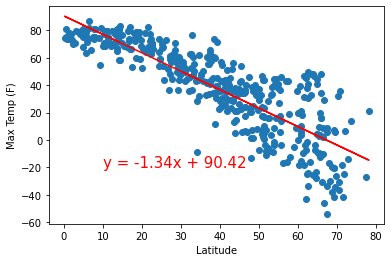

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
plot_linear_regression(x, y, "", "Latitude", "Max Temp (F)",(10,-20))


The r-value is: 0.37076365142826395


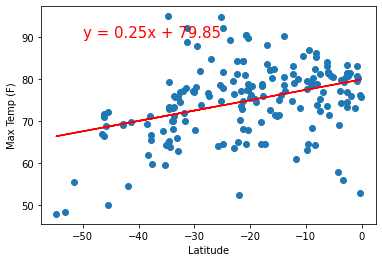

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

plot_linear_regression(x, y, "",'Latitude', 'Max Temp (F)',(-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40652255383043906


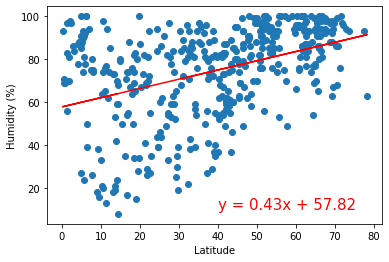

In [17]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

plot_linear_regression(x, y, "", 'Latitude', 'Humidity (%)',(40,10))


The r-value is: 0.44333827084808747


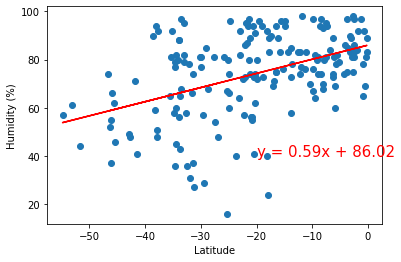

In [18]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

plot_linear_regression(x, y, "", 'Latitude', 'Humidity (%)',(-20,40))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.28390747149833057


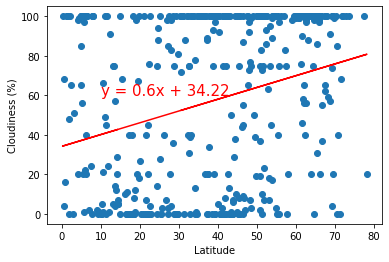

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

plot_linear_regression(x, y, "",'Latitude','Cloudiness (%)',(10,60))


The r-value is: 0.40957831548919127


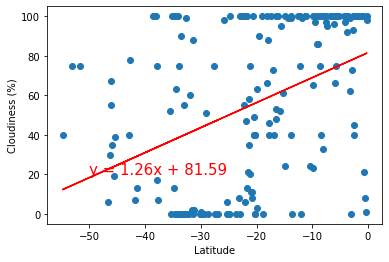

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

plot_linear_regression(x, y, "",'Latitude','Cloudiness (%)',(-50,20))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10273824253596184


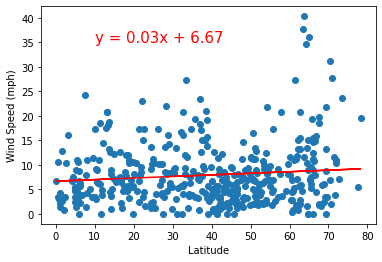

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

plot_linear_regression(x, y, "",'Latitude', 'Wind Speed (mph)',(10,35))


The r-value is: -0.2698334553499929


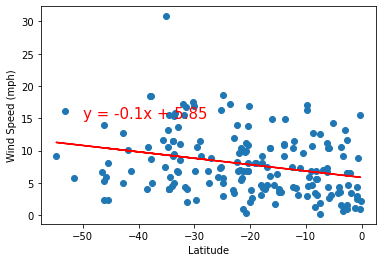

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

plot_linear_regression(x, y, "",'Latitude', 'Wind Speed (mph)',(-50,15))


**Discussion about the linear relationship:** YOUR RESPONSE HERE